In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
M = 2 #number of states
K = 6 #number of possible emissions
L = 300 #length of sequence
#beginning distribution is solution for system of equations: 
#(x,y)transition_matrix = x
#x + y = 1
pi = np.array([2.0/3, 1.0/3])
transition_matrix = np.array([
    [0.95, 0.05],
    [0.1, 0.9]]
)
emission_matrix = np.array([
    [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6],
    [1.0/10, 1.0/10, 1.0/10, 1.0/10, 1.0/10, 5.0/10]]
)

In [3]:
dices = [0, 1]
score = [0, 1, 2, 3, 4, 5]
hidden_sequence = np.zeros(L, dtype=np.int)
observed_sequence = np.zeros(L, dtype=np.int)
hidden_sequence[0] = np.random.choice(dices, 1, p = pi)
for i in range(1, L):
    hidden_sequence[i] = np.random.choice(dices, 1, p = transition_matrix[int(hidden_sequence[i-1])])
    observed_sequence[i] = np.random.choice(score, 1, p = emission_matrix[int(hidden_sequence[i-1])])

In [4]:
hidden_sequence

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
observed_sequence

array([0, 5, 1, 0, 1, 1, 3, 1, 5, 2, 5, 2, 5, 3, 4, 0, 5, 3, 5, 3, 3, 0,
       4, 0, 4, 5, 5, 5, 1, 5, 5, 5, 4, 3, 1, 1, 3, 3, 1, 1, 0, 4, 1, 2,
       4, 2, 2, 5, 3, 5, 0, 5, 3, 0, 2, 2, 1, 5, 1, 0, 0, 3, 2, 5, 0, 1,
       4, 5, 1, 5, 0, 0, 2, 1, 3, 5, 5, 1, 4, 1, 3, 4, 4, 1, 0, 4, 1, 1,
       1, 5, 5, 3, 4, 1, 0, 1, 3, 4, 4, 2, 0, 5, 2, 2, 5, 4, 5, 4, 5, 5,
       5, 0, 4, 0, 5, 5, 5, 5, 2, 5, 4, 2, 5, 3, 4, 1, 5, 0, 5, 5, 0, 4,
       4, 3, 0, 3, 2, 2, 4, 3, 2, 0, 1, 5, 5, 3, 5, 5, 5, 5, 3, 3, 1, 4,
       1, 4, 0, 5, 5, 5, 5, 0, 3, 0, 5, 1, 5, 4, 5, 5, 5, 5, 1, 0, 3, 2,
       4, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 1, 3, 0, 0, 1, 0, 4, 2, 2, 0, 0,
       1, 5, 2, 3, 5, 4, 1, 2, 3, 2, 0, 3, 2, 3, 0, 4, 0, 4, 1, 1, 4, 5,
       5, 3, 5, 1, 3, 5, 5, 2, 2, 2, 0, 3, 2, 3, 0, 3, 5, 1, 2, 4, 1, 0,
       2, 2, 5, 4, 1, 4, 3, 0, 3, 2, 0, 0, 4, 1, 4, 3, 5, 0, 5, 0, 3, 2,
       5, 3, 2, 5, 4, 3, 1, 2, 3, 5, 5, 5, 4, 5, 5, 5, 5, 0, 1, 3, 4, 1,
       4, 0, 4, 2, 3, 0, 1, 0, 5, 3, 5, 4, 2, 1])

In [6]:
#transition matrix log transformation
transition_matrix_log10 = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        transition_matrix_log10[i, j] = math.log(transition_matrix[i, j], 10)
print(transition_matrix_log10)

[[-0.02227639 -1.30103   ]
 [-1.         -0.04575749]]


In [7]:
#emission matrix log transformation
emission_matrix_log10 = np.zeros((M, K))
for i in range(M):
    for j in range(K):
        emission_matrix_log10[i, j] = math.log(emission_matrix[i, j], 10)
print(emission_matrix_log10)

[[-0.77815125 -0.77815125 -0.77815125 -0.77815125 -0.77815125 -0.77815125]
 [-1.         -1.         -1.         -1.         -1.         -0.30103   ]]


In [8]:
def viterbi(obs, pi, trans, emis):
    N = trans.shape[0]
    delta = np.zeros((L, N))
    psi = np.zeros((L, N))
    delta[0] = pi*emis[:,obs[0]]
    for l in range(1, L):
        for j in range(N):
            delta[l,j] = np.max(delta[l-1] + trans[:,j]) + emis[j, obs[l]]
            psi[l,j] = np.argmax(delta[l-1] + trans[:,j])

    states = np.zeros(L, dtype=np.int32)
    states[L-1] = np.argmax(delta[L-1])
    for l in range(L-2, -1, -1):
        states[l] = psi[l+1, states[l+1]]
    return states

In [9]:
viterbi_path_log10=viterbi(observed_sequence, pi, transition_matrix_log10, emission_matrix_log10)
viterbi_path_log10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

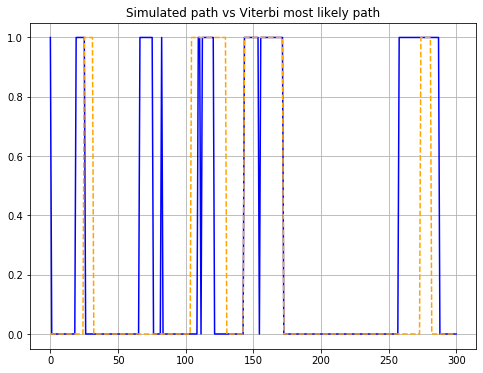

In [10]:
x = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(x, hidden_sequence, ls ='-', color = 'blue')
ax.plot(x, viterbi_path_log10, ls ='--', color = 'orange')
plt.title('Simulated path vs Viterbi most likely path')
plt.grid()
plt.show()

In [11]:
#forward algorithm
def forward(obs, pi, trans, emis):
    forw = np.zeros((L, M))
    forw[0] = pi*emis[:,obs[0]]
    for l in range(1, L):
        forw[l] = np.dot(forw[l-1],trans) * emis[:, obs[l]]
    forw_prob = forw[-1].sum()
    return forw, forw_prob

In [12]:
forw, forw_prob = forward(observed_sequence, pi, transition_matrix, emission_matrix)
forw_prob

9.463600935364426e-229

In [13]:
#backward algorithm
def backward(obs, pi, trans, emis):
    back = np.zeros((M,L))
    back[:,-1:] = 1
    for l in reversed(range(L-1)):
        for m in range(M):
            back[m,l] = np.sum(back[:,l+1] * trans[m,:] * emis[:,obs[l+1]])
    back_prob = np.sum(pi * emis[:, obs[0]] * back[:,0])
    return back, back_prob

In [14]:
back, back_prob = backward(observed_sequence, pi, transition_matrix, emission_matrix)
back_prob

9.463600935364428e-229

In [15]:
#posterior probabilities
posterior_prob = np.multiply(forw, back.T) / forw_prob
posterior_prob

array([[0.77860299, 0.22139701],
       [0.76537215, 0.23462785],
       [0.834495  , 0.165505  ],
       [0.86822099, 0.13177901],
       [0.87846002, 0.12153998],
       [0.86882788, 0.13117212],
       [0.83592309, 0.16407691],
       [0.76812575, 0.23187425],
       [0.64149408, 0.35850592],
       [0.62428208, 0.37571792],
       [0.56207033, 0.43792967],
       [0.58664942, 0.41335058],
       [0.56984819, 0.43015181],
       [0.6420538 , 0.3579462 ],
       [0.66755042, 0.33244958],
       [0.65534185, 0.34465815],
       [0.60111679, 0.39888321],
       [0.63232198, 0.36767802],
       [0.62372468, 0.37627532],
       [0.7069989 , 0.2930011 ],
       [0.74328837, 0.25671163],
       [0.74540825, 0.25459175],
       [0.71410714, 0.28589286],
       [0.63833148, 0.36166852],
       [0.49132203, 0.50867797],
       [0.22116429, 0.77883571],
       [0.130833  , 0.869167  ],
       [0.10971661, 0.89028339],
       [0.13195787, 0.86804213],
       [0.11568883, 0.88431117],
       [0.

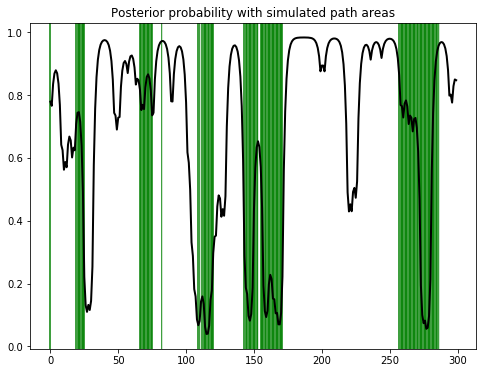

In [16]:
#green area - wrong dice, white area - right dice
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(L):
    if hidden_sequence[i] == 0:
        plt.axvline(x = i, color = 'white')
    else:
        plt.axvline(x = i, color = 'green')
plt.plot(range(L), posterior_prob[:,0], color = 'black', linewidth = 2)
plt.title('Posterior probability with simulated path areas')
plt.show()

In [17]:
#initialization (assign random values)
pi_new = np.array([6.0/10, 4.0/10])
transition_matrix_new = np.array([
    [0.8, 0.2],
    [0.3, 0.7]]
)
emission_matrix_new = np.array([[0.2, 0.1, 0.1, 0.3, 0.1, 0.2],
                  [0.05, 0.1, 0.05, 0.6, 0.1, 0.1]])

In [18]:
dices = [0, 1]
score = [0, 1, 2, 3, 4, 5]
hidden_sequence_new, observed_sequence_new = np.zeros(L, dtype=np.int), np.zeros(L, dtype=np.int)
hidden_sequence_new[0] = np.random.choice(dices, 1, p = pi)
for i in range(1, L):
    hidden_sequence_new[i] = np.random.choice(dices, 1, p = transition_matrix_new[int(hidden_sequence_new[i-1])])
    observed_sequence_new[i] = np.random.choice(score, 1, p = emission_matrix_new[int(hidden_sequence_new[i-1])])

In [19]:
hidden_sequence_new

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [20]:
observed_sequence_new

array([0, 0, 5, 1, 3, 2, 0, 2, 5, 3, 3, 3, 3, 0, 4, 1, 0, 0, 0, 4, 3, 1,
       1, 1, 2, 0, 3, 3, 0, 4, 0, 3, 5, 0, 3, 4, 5, 4, 5, 0, 3, 1, 3, 2,
       4, 1, 3, 4, 3, 3, 3, 3, 0, 4, 3, 3, 3, 5, 0, 1, 3, 3, 5, 1, 3, 0,
       0, 5, 3, 1, 3, 5, 3, 3, 4, 5, 3, 0, 5, 3, 3, 3, 3, 1, 3, 0, 0, 0,
       4, 0, 3, 5, 4, 4, 5, 0, 3, 3, 2, 4, 0, 3, 3, 4, 5, 3, 0, 3, 3, 0,
       3, 4, 3, 5, 3, 5, 2, 1, 3, 3, 3, 1, 3, 3, 5, 5, 0, 3, 5, 5, 5, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 4, 1, 5, 5, 5, 3, 4, 1, 2, 3, 0, 3, 5, 5,
       3, 4, 2, 0, 3, 5, 2, 1, 4, 5, 3, 3, 4, 3, 2, 3, 1, 5, 3, 3, 3, 3,
       3, 5, 3, 1, 3, 5, 5, 3, 1, 1, 0, 3, 3, 5, 4, 3, 3, 2, 4, 0, 0, 3,
       3, 3, 2, 4, 2, 2, 3, 4, 5, 3, 4, 5, 5, 0, 3, 3, 3, 3, 4, 5, 3, 3,
       3, 3, 3, 1, 3, 0, 5, 0, 3, 4, 3, 3, 4, 2, 3, 0, 3, 3, 3, 3, 3, 1,
       5, 5, 3, 3, 1, 5, 5, 0, 5, 3, 5, 3, 0, 5, 3, 1, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 1, 0, 3, 3, 3, 1, 0, 5, 1, 4, 3, 0, 3, 0,
       5, 0, 1, 3, 2, 3, 3, 4, 3, 2, 0, 3, 2, 1])

In [21]:
#forward algorithm for sequence x (observed_sequence_new)
forw_new, forw_prob_new = forward(observed_sequence_new, pi_new, transition_matrix_new, emission_matrix_new)
forw_prob_new

3.07985755189216e-206

In [22]:
#backward algorithm for sequence x (observed_sequence_new)
back_new, back_prob_new = backward(observed_sequence_new, pi_new, transition_matrix_new, emission_matrix_new)
back_prob_new

3.079857551892157e-206

In [23]:
#parameter for transition matrix
def model_param_a(trans, emis):
    forw_new, forw_prob_new = forward(observed_sequence_new, pi_new, trans, emis)
    back_new = backward(observed_sequence_new, pi_new, trans, emis)[0]
    A = np.zeros((M, M))
    a = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            for k in range(1, L - 1):
                A[i, j] += forw_new[k, i] * trans[i, j] * emis[j, observed_sequence_new[k]] * back_new[j, k + 1]
    A = A / forw_prob_new
    for i in range(M):
        for j in range(M):
            a[i, j] = A[i, j] / np.sum(A[i])
    return a

In [24]:
a1 = model_param_a(transition_matrix_new, emission_matrix_new)

In [25]:
#parameter for emission matrix
def model_param_e(trans, emis):
    E = np.zeros((M, K))
    e = np.zeros((M, K))
    for i in range(M):
        for j in range(K):
            for k in range(L):
                if observed_sequence_new[k] == j + 1:
                    E[i, j] += forw_new[k, i] * back_new[i, k]
    for i in range(M):
        for j in range(K):
            e[i, j] = E[i, j] / np.sum(E[i])
    return e

In [26]:
e1 = model_param_e(transition_matrix_new, emission_matrix_new)

In [27]:
kkk1=0
a0 = np.zeros((M, M))
e0 = np.zeros((M, K))
while np.any(abs(a1 - a0) > 0.001) or np.any(abs(e1 - e0) > 0.001):
    a0, a1 = a1, model_param_a(a1, emission_matrix_new)
    e0, e1 = e1, model_param_e(transition_matrix_new, e1)
    kkk1+=1
print(a1)
print(e1)
print(kkk1)

[[0.90784765 0.09215235]
 [0.04217106 0.95782894]]
[[0.12292701 0.10626753 0.38499479 0.13590418 0.24990649 0.        ]
 [0.10045606 0.05156252 0.64553928 0.10185959 0.10058255 0.        ]]
19
